Dataset Explanation

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load Dataset
file_path = "classification.csv"
df = pd.read_csv(file_path)

# Display dataset information and preview
df_info = df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [56]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**Dataset Explanation**

This dataset appears to be a binary classification dataset where the goal is to predict a categorical outcome (y) based on various demographic and economic factors.

**Dataset Structure**
1. Number of Rows: 48,842
2. Number of Columns: 11
3. Target Variable: y (Binary: 0 or 1)
4. Feature Variables (Categorical):
* hours_per_week_bin: Categorized work hours per week.
* occupation_bin: Grouped occupation levels.
* msr_bin: Economic or marital status classification.
* capital_gl_bin: Categorized capital gain/loss.
* race_sex_bin: Combined race and gender category.
* education_num_bin: Grouped education years.
* education_bin: Education level classification.
* workclass_bin: Type of work category.
* age_bin: Age grouped into bins.
* flag: Indicates training (train) or test (test) set.

Classification Tasks: The goal of the classification model (Logistic/Probit Regression) is to predict y, which is a binary label (0 or 1). What are we classifying? We are predicting whether an individual earns more than 50K per year based on demographic and work-related factors.

Data preparation

In [57]:
# Data Preparation
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

# Split dataset into train and test
y_train = df[df['flag']=='train']['y']
x_train = df[df['flag']=='train'][cat_feats]
x_train = pd.get_dummies(x_train, columns=cat_feats, drop_first=True)

y_test = df[df['flag']=='test']['y']
x_test = df[df['flag']=='test'][cat_feats]
x_test = pd.get_dummies(x_test, columns=cat_feats, drop_first=True)

# Convert to numpy arrays
x_train, y_train = x_train.values, y_train.values
x_test, y_test = x_test.values, y_test.values

# Apply manual feature scaling
mean_train = np.mean(x_train, axis=0)
std_train = np.std(x_train, axis=0)
x_train_scaled = (x_train - mean_train) / std_train
x_test_scaled = (x_test - mean_train) / std_train


Assignment

Learning Rate: 0.001, Iterations: 500


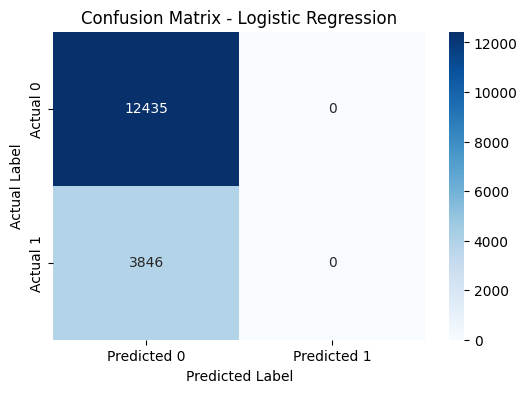

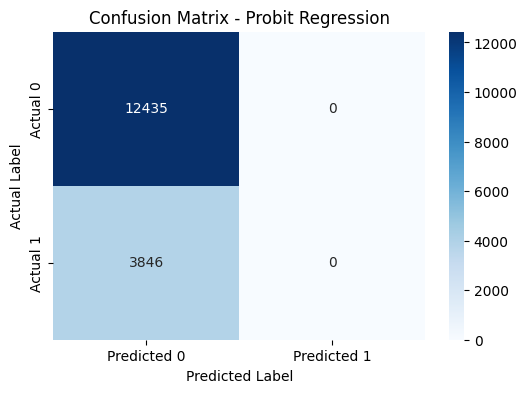

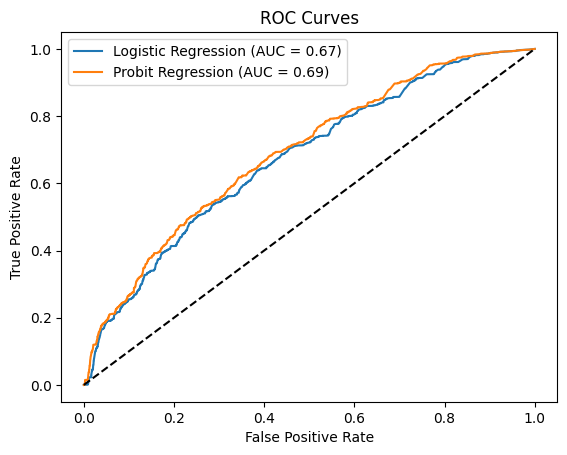

auc_lr = 0.6741707006438681, auc_pr = 0.6905795001401986
Learning Rate: 0.001, Iterations: 2000


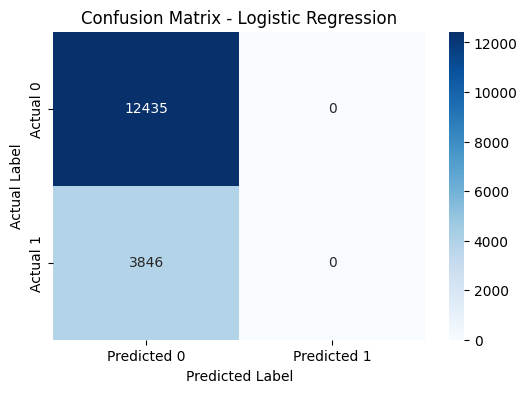

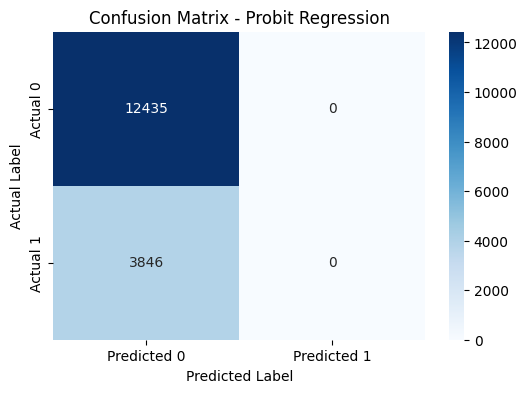

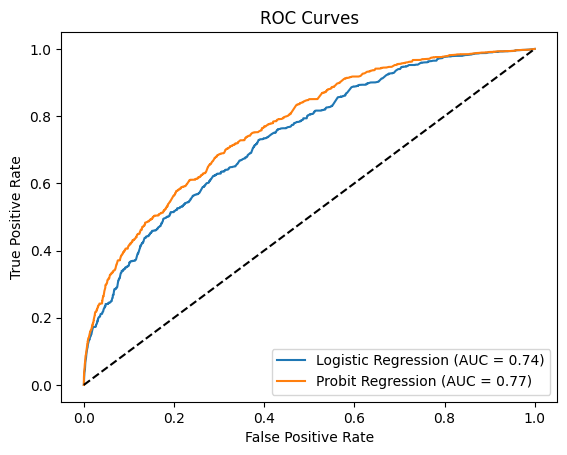

auc_lr = 0.7377111369135103, auc_pr = 0.7693420137288001
Learning Rate: 0.001, Iterations: 3000


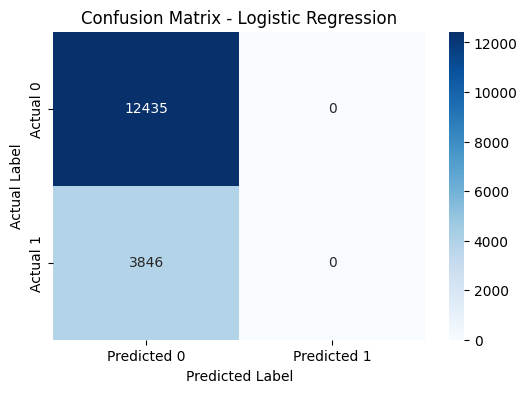

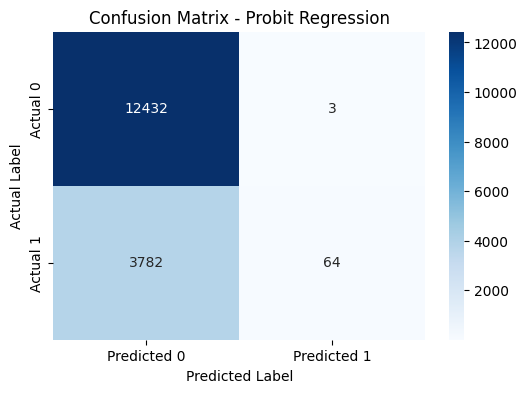

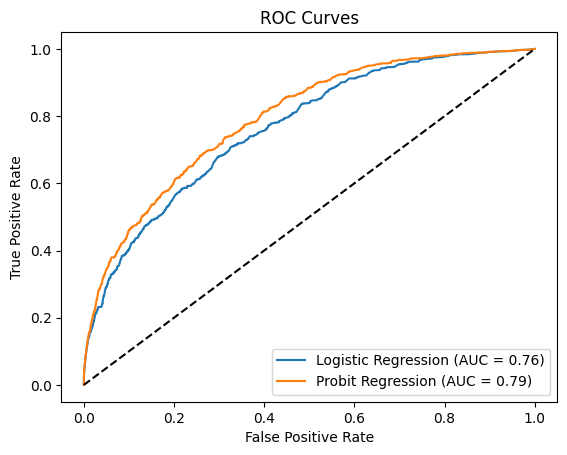

auc_lr = 0.7649471374914505, auc_pr = 0.7938386944404194
Learning Rate: 0.001, Iterations: 5000


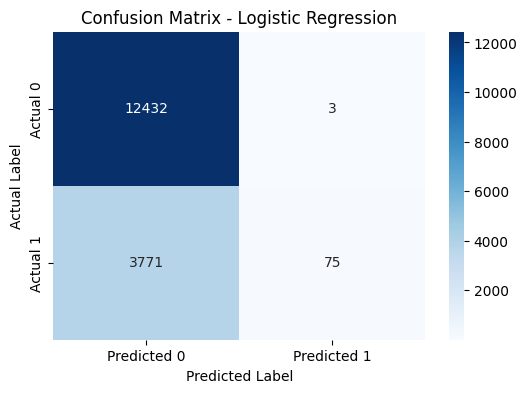

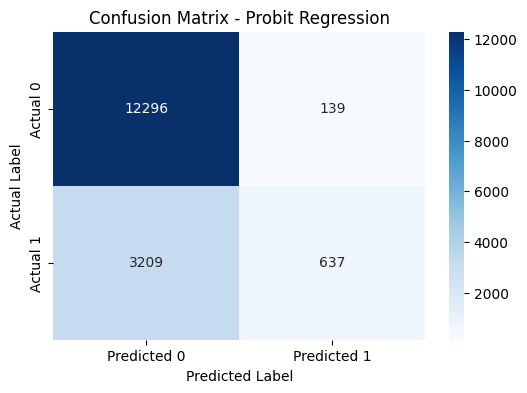

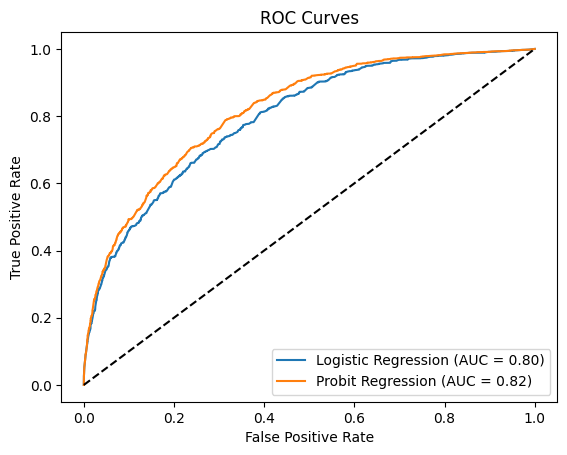

auc_lr = 0.7952010569365275, auc_pr = 0.817171590763912
Learning Rate: 0.01, Iterations: 500


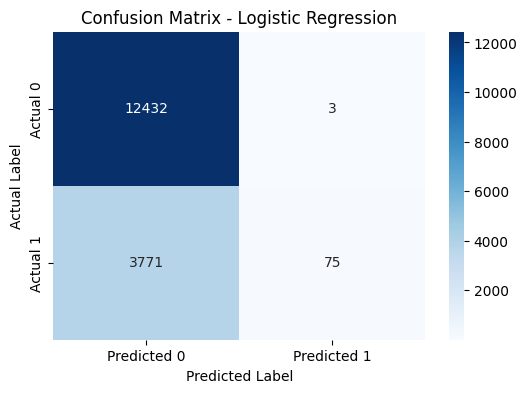

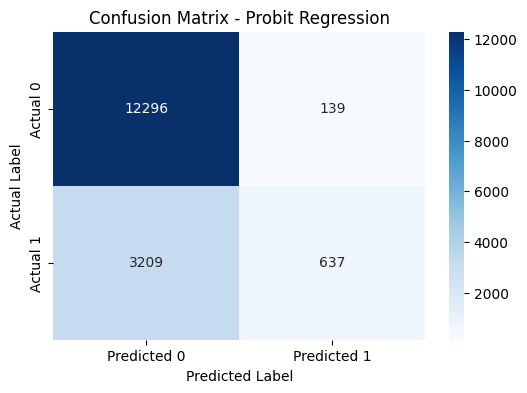

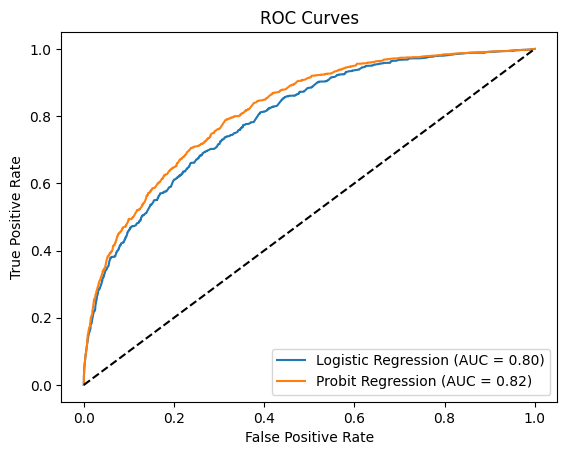

auc_lr = 0.7951930067552521, auc_pr = 0.8171698970894099
Learning Rate: 0.01, Iterations: 2000


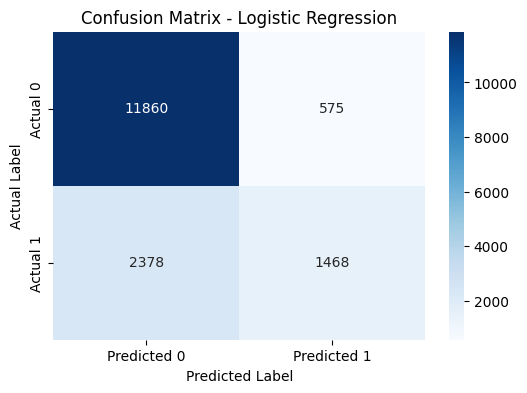

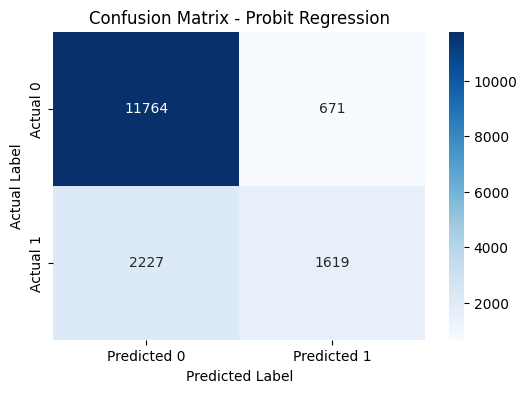

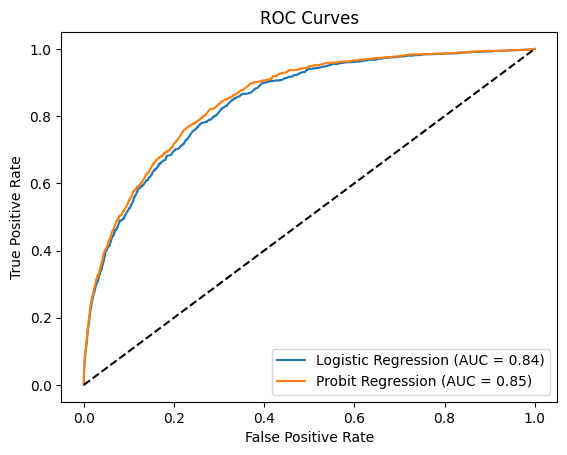

auc_lr = 0.8409894425531745, auc_pr = 0.851155671478166
Learning Rate: 0.01, Iterations: 3000


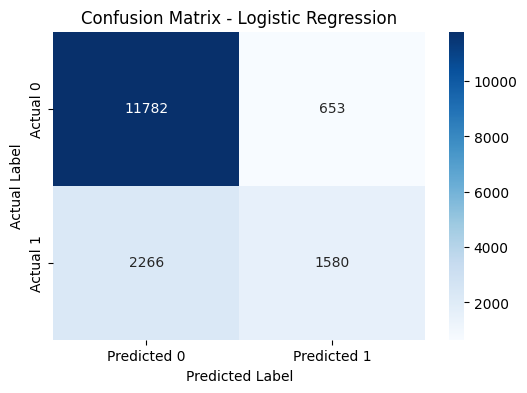

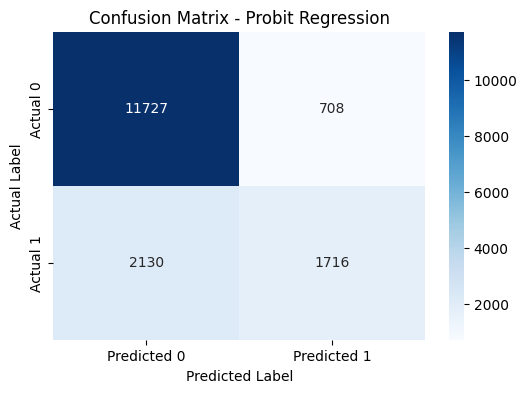

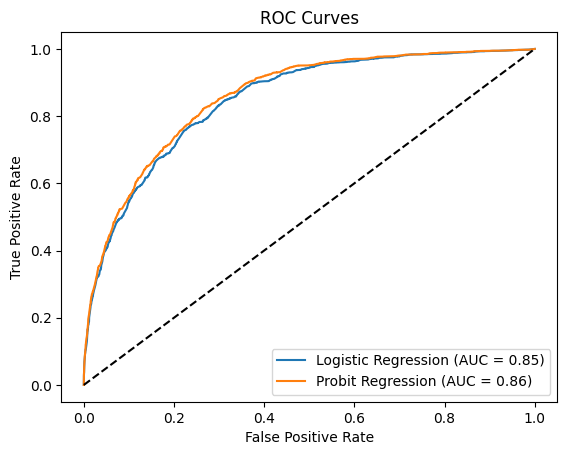

auc_lr = 0.8486511241712235, auc_pr = 0.8583099616706824
Learning Rate: 0.01, Iterations: 5000


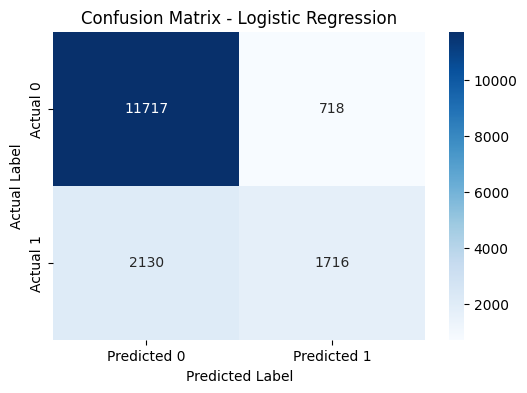

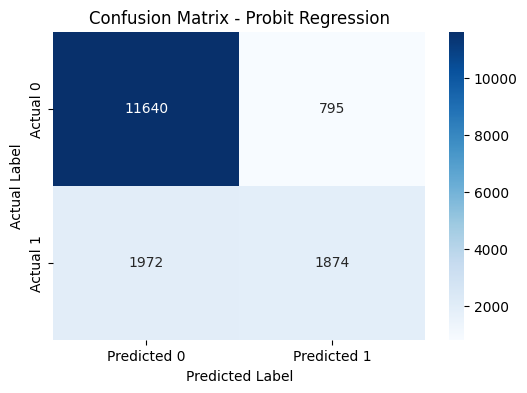

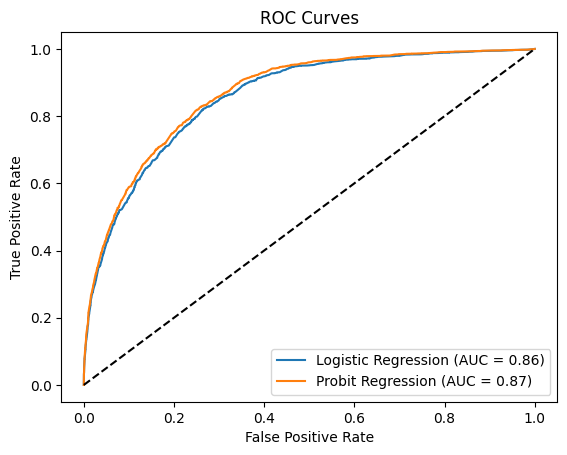

auc_lr = 0.8577702858818013, auc_pr = 0.8671113398617165
Learning Rate: 0.1, Iterations: 500


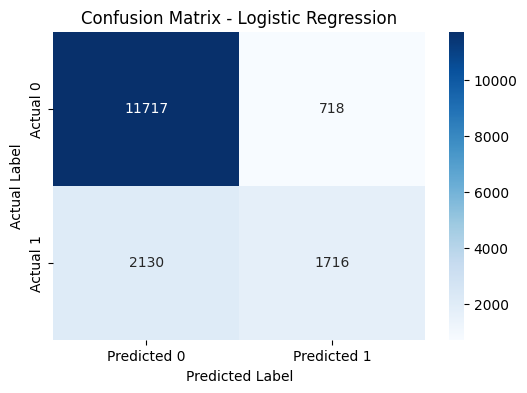

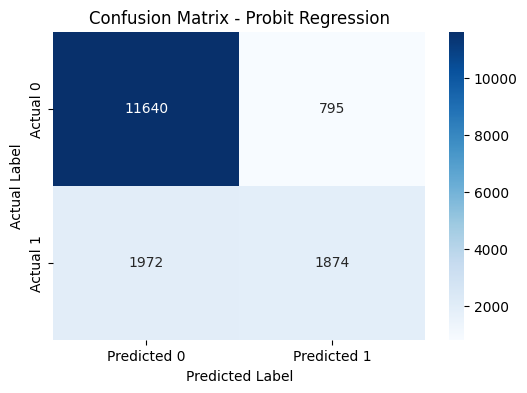

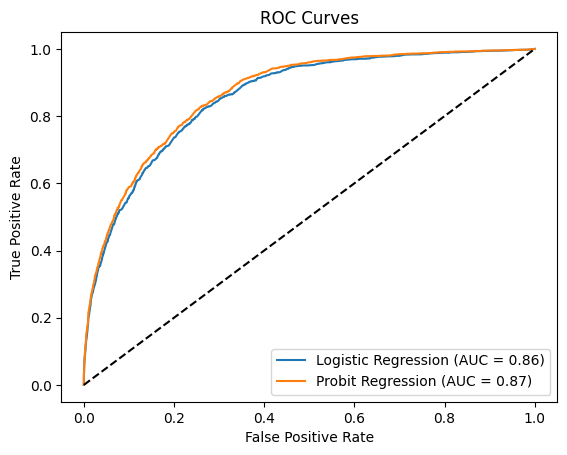

auc_lr = 0.8577718750084944, auc_pr = 0.8671139953760596
Learning Rate: 0.1, Iterations: 2000


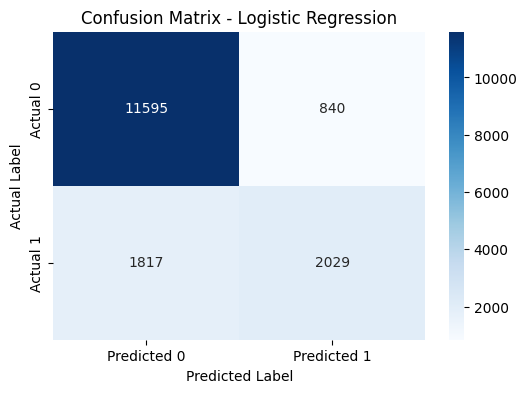

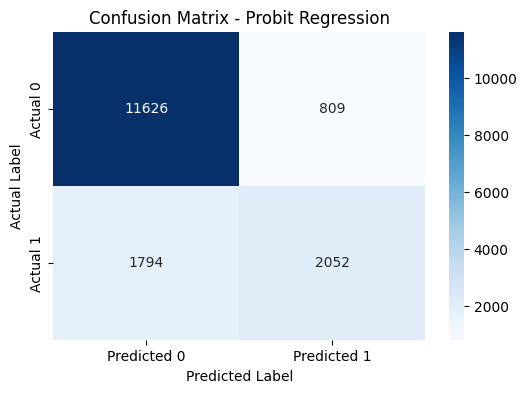

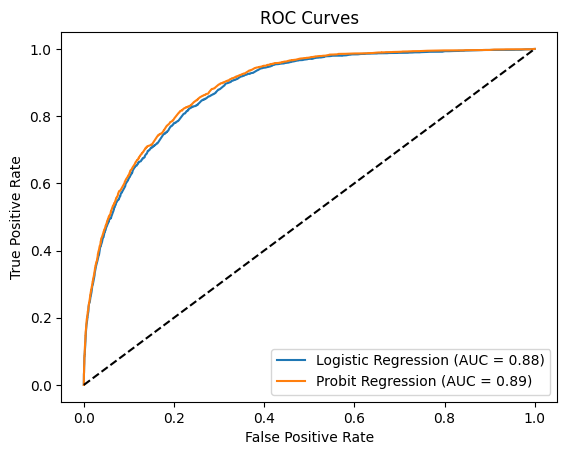

auc_lr = 0.8788870613931916, auc_pr = 0.8854591457482184
Learning Rate: 0.1, Iterations: 3000


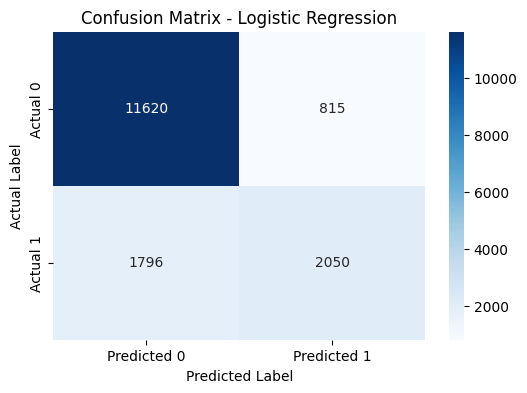

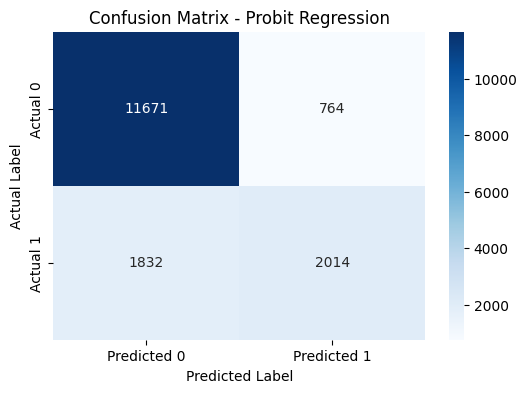

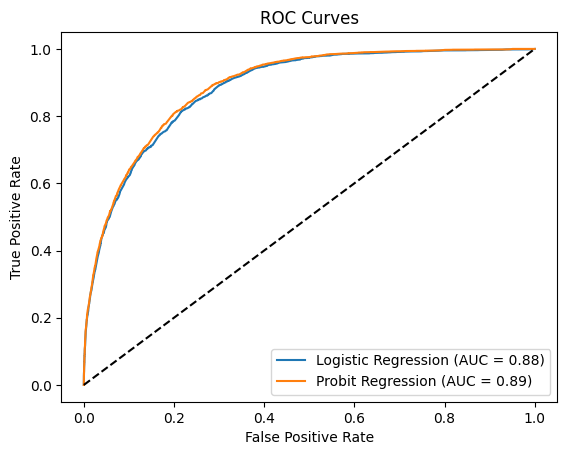

auc_lr = 0.883781697066033, auc_pr = 0.8895890560190161
Learning Rate: 0.1, Iterations: 5000


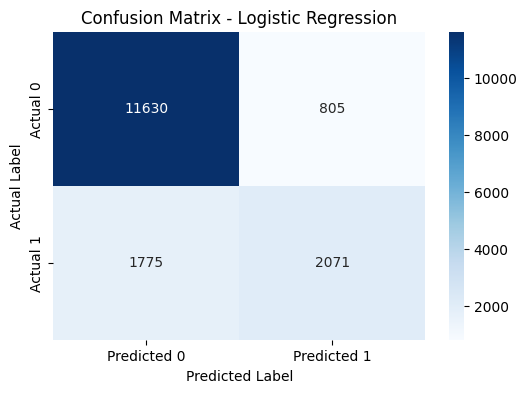

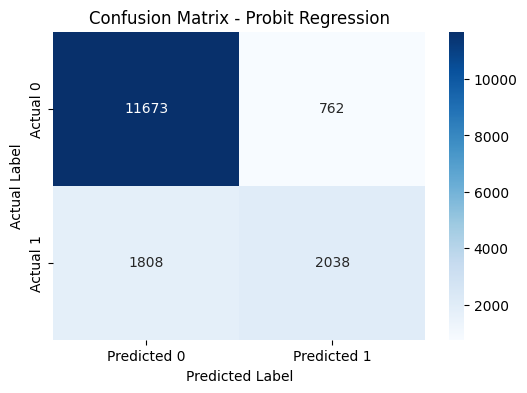

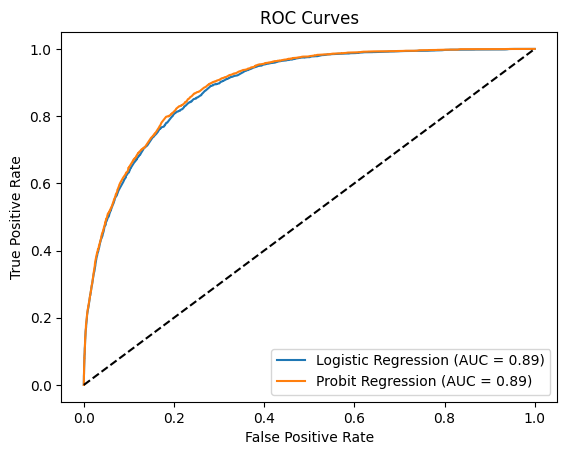

auc_lr = 0.8892513456871205, auc_pr = 0.8935098079435843


In [58]:

# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate, iterations):
        # pass
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # pass
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.w) + self.b
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict_proba(self, X):
        # pass
        linear_model = np.dot(X, self.w) + self.b
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        # pass
        return (self.predict_proba(X) >= threshold).astype(int)

# Probit Regression from Scratch
class ProbitRegressionScratch:
    def __init__(self, learning_rate, iterations):
        # pass
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None

    def probit_cdf(self, z):
        return norm.cdf(z)

    def fit(self, X, y):
        # pass
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.iterations):
            linear_model = np.dot(X, self.w) + self.b
            y_predicted = self.probit_cdf(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict_proba(self, X):
        # pass
        linear_model = np.dot(X, self.w) + self.b
        return self.probit_cdf(linear_model)

    def predict(self, X, threshold=0.5):
        # pass
        return (self.predict_proba(X) >= threshold).astype(int)

# Define different learning rates and iteration settings for experimentation
learning_rates = [0.001, 0.01, 0.1]
iterations_list = [500, 2000, 3000, 5000]

# Iterate through different hyperparameter combinations
for lr in learning_rates:
    for iters in iterations_list:
      print(f"Learning Rate: {lr}, Iterations: {iters}")

      # Train Models
      lr_scratch = LogisticRegressionScratch(learning_rate=lr, iterations=iters)
      lr_scratch.fit(x_train, y_train)

      pr_scratch = ProbitRegressionScratch(learning_rate=lr, iterations=iters)
      pr_scratch.fit(x_train, y_train)

      # Predictions
      y_pred_lr = lr_scratch.predict(x_test)
      y_prob_lr = lr_scratch.predict_proba(x_test)

      y_pred_pr = pr_scratch.predict(x_test)
      y_prob_pr = pr_scratch.predict_proba(x_test)

      # Compute Confusion Matrices
      def compute_confusion_matrix(y_true, y_pred):
          pass

      cm_lr = confusion_matrix(y_test, y_pred_lr)
      cm_pr = confusion_matrix(y_test, y_pred_pr)

      # Compute ROC Curves and AUC
      def compute_roc_curve(y_true, y_scores):
          pass

      def compute_auc(fpr, tpr):
          pass

      fpr_lr, tpr_lr, _  = roc_curve(y_test, y_prob_lr)
      fpr_pr, tpr_pr, _  = roc_curve(y_test, y_prob_pr)
      auc_lr = auc(fpr_lr, tpr_lr)
      auc_pr = auc(fpr_pr, tpr_pr)

      # Display Confusion Matrices
      df_cm_lr = pd.DataFrame(cm_lr, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
      df_cm_pr = pd.DataFrame(cm_pr, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

      # Display Confusion Matrix for Logistic Regression
      plt.figure(figsize=(6,4))
      sns.heatmap(df_cm_lr, annot=True, fmt="d", cmap="Blues")
      plt.title("Confusion Matrix - Logistic Regression")
      plt.ylabel("Actual Label")
      plt.xlabel("Predicted Label")
      plt.show()

      # Display Confusion Matrix for Probit Regression
      plt.figure(figsize=(6,4))
      sns.heatmap(df_cm_pr, annot=True, fmt="d", cmap="Blues")
      plt.title("Confusion Matrix - Probit Regression")
      plt.ylabel("Actual Label")
      plt.xlabel("Predicted Label")
      plt.show()

      # Plot ROC Curves
      plt.figure()
      plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
      plt.plot(fpr_pr, tpr_pr, label=f'Probit Regression (AUC = {auc_pr:.2f})')
      plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('ROC Curves')
      plt.legend()
      plt.show()

      # Return AUC Values
      print(f"auc_lr = {auc_lr}, auc_pr = {auc_pr}")